In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [45]:
#load dataset
titanic_data=pd.read_csv("C:/Users/Mehak Goel/Downloads/train.csv")

In [68]:
titanic_data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,True
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,True,False,True
887,888,1,1,19.0,0,0,30.0000,False,False,True
888,889,0,3,28.0,1,2,23.4500,False,False,True
889,890,1,1,26.0,0,0,30.0000,True,False,False


In [47]:
#preprocessing-Preprocessing refers to the steps taken to prepare raw data for analysis or modeling
#drop irrelevant colums 
titanic_data.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
#handling missing values
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)
#encoding categorical variables
#used one hot encoding--converts categorical variables into numerical format
#drop_first is used to drop the first level of each categorical variable after one hot encoding
#reducing the risk of multicollinearity
titanic_data = pd.get_dummies(titanic_data, columns=['Sex', 'Embarked'], drop_first=True)

C:\Users\Mehak Goel\AppData\Local\Temp\ipykernel_24864\109198185.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)
C:\Users\Mehak Goel\AppData\Local\Temp\ipykernel_24864\109198185.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alwa

In [56]:
# Split data into features and target variable
#it provides reliable predictions on unseen data

X = titanic_data.drop('Survived', axis=1)
y = titanic_data['Survived']
X

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,3,22.0,1,0,7.2500,True,False,True
1,2,1,38.0,1,0,71.2833,False,False,False
2,3,3,26.0,0,0,7.9250,False,False,True
3,4,1,35.0,1,0,53.1000,False,False,True
4,5,3,35.0,0,0,8.0500,True,False,True
...,...,...,...,...,...,...,...,...,...
886,887,2,27.0,0,0,13.0000,True,False,True
887,888,1,19.0,0,0,30.0000,False,False,True
888,889,3,28.0,1,2,23.4500,False,False,True
889,890,1,26.0,0,0,30.0000,True,False,False


In [66]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [67]:
X_train

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
331,332,1,45.5,0,0,28.5000,True,False,True
733,734,2,23.0,0,0,13.0000,True,False,True
382,383,3,32.0,0,0,7.9250,True,False,True
704,705,3,26.0,1,0,7.8542,True,False,True
813,814,3,6.0,4,2,31.2750,False,False,True
...,...,...,...,...,...,...,...,...,...
106,107,3,21.0,0,0,7.6500,False,False,True
270,271,1,28.0,0,0,31.0000,True,False,True
860,861,3,41.0,2,0,14.1083,True,False,True
435,436,1,14.0,1,2,120.0000,False,False,True


In [60]:
X_test

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
709,710,3,28.0,1,1,15.2458,True,False,False
439,440,2,31.0,0,0,10.5000,True,False,True
840,841,3,20.0,0,0,7.9250,True,False,True
720,721,2,6.0,0,1,33.0000,False,False,True
39,40,3,14.0,1,0,11.2417,False,False,False
...,...,...,...,...,...,...,...,...,...
433,434,3,17.0,0,0,7.1250,True,False,True
773,774,3,28.0,0,0,7.2250,True,False,False
25,26,3,38.0,1,5,31.3875,False,False,True
84,85,2,17.0,0,0,10.5000,False,False,True


In [61]:
y_test

709    1
439    0
840    0
720    1
39     1
      ..
433    0
773    0
25     1
84     1
10     1
Name: Survived, Length: 179, dtype: int64

In [62]:
y_train

331    0
733    0
382    0
704    0
813    0
      ..
106    1
270    0
860    0
435    1
102    0
Name: Survived, Length: 712, dtype: int64

In [63]:
# Feature scaling
#so that there is no data leakage
# class calculates the mean and standard deviation 

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled

array([[-0.45306593, -1.61413602,  1.25364106, ...,  0.7243102 ,
        -0.30335547,  0.59248936],
       [ 1.11387354, -0.40055118, -0.47728355, ...,  0.7243102 ,
        -0.30335547,  0.59248936],
       [-0.25427511,  0.81303367,  0.21508629, ...,  0.7243102 ,
        -0.30335547,  0.59248936],
       ...,
       [ 1.60890168,  0.81303367,  0.90745614, ...,  0.7243102 ,
        -0.30335547,  0.59248936],
       [-0.04768856, -1.61413602, -1.1696534 , ..., -1.38062393,
        -0.30335547,  0.59248936],
       [-1.34567573, -1.61413602, -0.63114352, ...,  0.7243102 ,
        -0.30335547,  0.59248936]])

In [64]:
X_test_scaled

array([[ 1.02032491,  0.81303367, -0.09263364, ...,  0.7243102 ,
        -0.30335547, -1.68779402],
       [-0.03209712, -0.40055118,  0.13815631, ...,  0.7243102 ,
        -0.30335547,  0.59248936],
       [ 1.53094449,  0.81303367, -0.7080735 , ...,  0.7243102 ,
        -0.30335547,  0.59248936],
       ...,
       [-1.64581091,  0.81303367,  0.67666619, ..., -1.38062393,
        -0.30335547,  0.59248936],
       [-1.4158372 , -0.40055118, -0.93886345, ..., -1.38062393,
        -0.30335547,  0.59248936],
       [-1.7042788 ,  0.81303367, -1.93895323, ..., -1.38062393,
        -0.30335547,  0.59248936]])

In [69]:
#EDA
#understanding the structure of data
#print few rows
print(titanic_data.head())

   PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  Sex_male  \
0            1         0       3  22.0      1      0   7.2500      True   
1            2         1       1  38.0      1      0  71.2833     False   
2            3         1       3  26.0      0      0   7.9250     False   
3            4         1       1  35.0      1      0  53.1000     False   
4            5         0       3  35.0      0      0   8.0500      True   

   Embarked_Q  Embarked_S  
0       False        True  
1       False       False  
2       False        True  
3       False        True  
4       False        True  


In [70]:
#info about the structure
print(titanic_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Sex_male     891 non-null    bool   
 8   Embarked_Q   891 non-null    bool   
 9   Embarked_S   891 non-null    bool   
dtypes: bool(3), float64(2), int64(5)
memory usage: 51.5 KB
None


In [75]:
#summary statistics for numerical features
print(titanic_data.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.361582    0.523008   
std     257.353842    0.486592    0.836071   13.019697    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [71]:
# Check for missing values
#indicates wether the element is missing or not
# for data imputation
print(titanic_data.isnull().sum())

# Handle missing values (e.g., imputation)
# Example: Impute missing values with mean
titanic_data.fillna(titanic_data.mean(), inplace=True)


PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
Sex_male       0
Embarked_Q     0
Embarked_S     0
dtype: int64


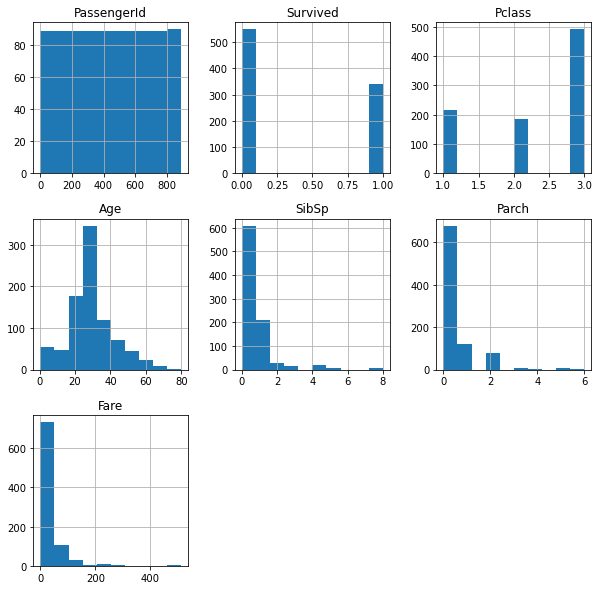

In [72]:
# Histogram of numerical features
#for numerical data
titanic_data.hist(figsize=(10, 10))
plt.show()

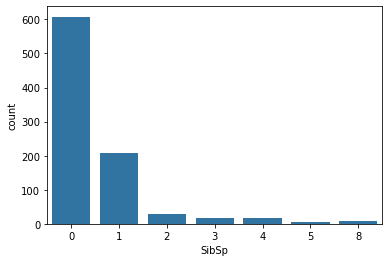

In [73]:
# Bar plot of age variables
sns.countplot(x='SibSp', data=titanic_data)
plt.show()

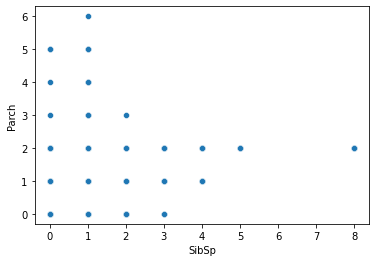

In [74]:
# Scatter plot of two numerical variables
sns.scatterplot(x='SibSp', y='Parch', data=titanic_data)
plt.show()

Logistic Regression Accuracy: 0.8044692737430168
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       105
           1       0.77      0.74      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179



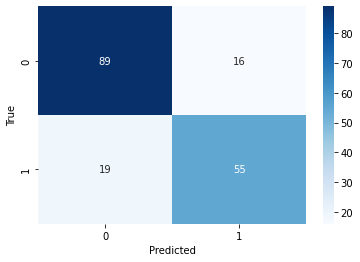

In [51]:
# Logistic Regression
lr_model = LogisticRegression() #defining lr
lr_model.fit(X_train_scaled, y_train) #train the model on training data 
lr_pred = lr_model.predict(X_test_scaled) #predictions on the test data
lr_accuracy = accuracy_score(y_test, lr_pred) #compare the true labels with predicted labels
print("Logistic Regression Accuracy:", lr_accuracy)
print("Logistic Regression Classification Report:")

# describe the performance of classification model
print(classification_report(y_test, lr_pred))
cm_lr = confusion_matrix(y_test, lr_pred)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Support Vector Machine Accuracy: 0.8100558659217877
Support Vector Machine Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       105
           1       0.81      0.70      0.75        74

    accuracy                           0.81       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179



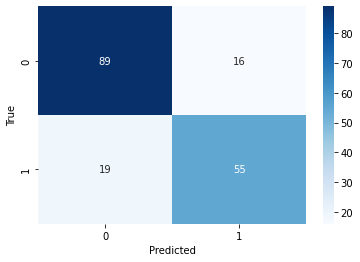

In [52]:
# Support Vector Machine
svm_model = SVC()
# used for finding hyperplane
svm_model.fit(X_train_scaled, y_train)
# takes the input as features and output as predicted labels
svm_pred = svm_model.predict(X_test_scaled)
# used to compare true labels and predicted labels
svm_accuracy = accuracy_score(y_test, svm_pred)
print("Support Vector Machine Accuracy:", svm_accuracy)
print("Support Vector Machine Classification Report:")
print(classification_report(y_test, svm_pred))
cm_lr = confusion_matrix(y_test, lr_pred)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Decision Tree Accuracy: 0.7541899441340782
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.79      0.79       105
           1       0.70      0.70      0.70        74

    accuracy                           0.75       179
   macro avg       0.75      0.75      0.75       179
weighted avg       0.75      0.75      0.75       179



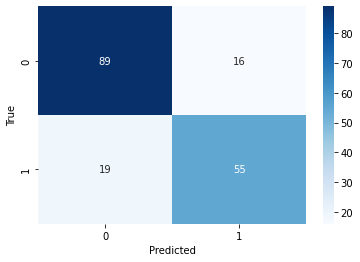

In [53]:
# Decision Tree
dt_model = DecisionTreeClassifier() 
dt_model.fit(X_train, y_train)  
dt_pred = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)
print("Decision Tree Accuracy:", dt_accuracy)
print("Decision Tree Classification Report:")
print(classification_report(y_test, dt_pred))
cm_lr = confusion_matrix(y_test, lr_pred)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()